In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

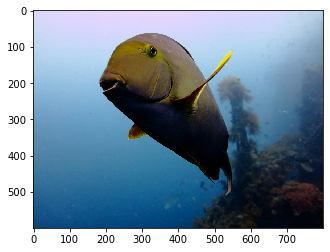

In [2]:
img_PIL = Image.open("im1.jpg")
img_raw = np.asarray(img_PIL)
plt.imshow(img_raw)

(600, 401, 3)


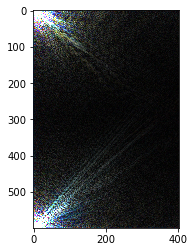

In [3]:
img_fft = np.fft.rfft2(img_raw, axes=(0,1))
res = (np.abs(img_fft)/100).astype("int")

print(res.shape)
plt.imshow(np.clip(res, 0, 255))
plt.savefig("out.png")
# jpg формат почему то не работает, сохраню в png
plt.show()

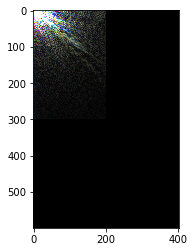

In [4]:
# удалим верхнюю половину частот по каждой координате
img_fft_crop = img_fft.copy()
img_fft_crop[300:] = 0
img_fft_crop[:, 200:] = 0

plt.imshow(np.clip(np.abs(img_fft_crop)/100, 0, 255).astype("int"))
plt.show()

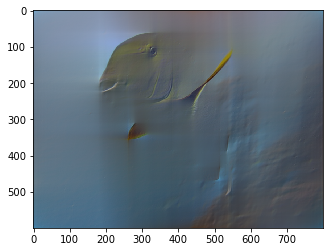

In [5]:
img_backward = np.fft.irfft2(img_fft_crop, axes=(0,1))
img_backward = (img_backward - np.min(img_backward)) / (np.max(img_backward) - np.min(img_backward)) * 255
img_backward = img_backward.astype("int")

plt.imshow(img_backward)
plt.savefig("out2.png")
plt.show()